MovieWriter imagemagick unavailable. Trying to use pillow instead.


a=0.203, b=1.053, loss=0.764
a=-0.105, b=1.552, loss=0.423
a=-0.334, b=1.923, loss=0.234
a=-0.505, b=2.199, loss=0.129
a=-0.632, b=2.404, loss=0.072
a=-0.726, b=2.557, loss=0.040
a=-0.796, b=2.671, loss=0.022
a=-0.849, b=2.755, loss=0.012
a=-0.887, b=2.818, loss=0.007
a=-0.916, b=2.865, loss=0.004


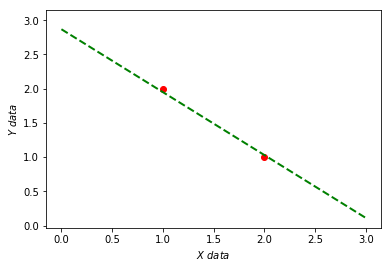

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt 
import matplotlib.animation as animation
import time

# 使用梯度下降算法训练模型：y = ax + b
# 给定两个点(1,2)和(2,1)，过这两个点拟合一条曲线
points = [(1,2), (2,1)] # 样本数据
learning_rate = 0.1     # 学习率
epochs = 100            # 迭代次数
w = (0, 0)              # 初始权重

def cal_loss(a, b):
    """计算损失"""
    sum_loss = [(a*x+b-y)**2 for x, y in points]
    return sum(sum_loss) / len(points)

def gradient_a(a, b):
    """损失函数在a方向上的梯度"""
    loss_grad = [2*(a*x+b-y)*x for x,y in points]
    return sum(loss_grad)

def gradient_b(a, b):
    """损失函数在b方向上的梯度"""
    loss_grad = [2*(a*x+b-y) for x,y in points]
    return sum(loss_grad)

def update(a, b):
    """更新权重"""
    return (a - learning_rate * gradient_a(a, b), 
            b - learning_rate * gradient_b(a, b))

def update_line(i):
    """更新gif"""
    global w
    try:
        ax.lines.pop(0)
    except Exception:
        pass    
    w = update(w[0], w[1])
    y = w[0]*x + w[1]
    line, = ax.plot(x, y, 'g--', label=r'$Fitting\ line$', lw=2)
    return line

fig, ax = plt.subplots()
train_X = [x for x, _ in points]
train_Y = [y for _, y in points]
l1 = ax.scatter(train_X, train_Y, color='red', label=r'$Original\ data$')
ax.set_xlabel(r'$X\ data$')
ax.set_ylabel(r'$Y\ data$')

ani = animation.FuncAnimation(fig, update_line, frames=100, interval=100)
ani.save('gradient.gif', writer='imagemagick', fps=5)

loss_arr = []
for i in range(epochs):
    w = update(w[0], w[1])
    loss = cal_loss(w[0], w[1])
    loss_arr.append(loss)
    if i % 10 == 9:
        print("a=%.3f, b=%.3f, loss=%.3f" % (w[0], w[1], loss))
    
#plt.plot(loss_arr) 
plt.show()

In [15]:
import numpy as np

# 使用梯度下降算法训练模型：Y = AX 
# 支持多个特征
points = [(1,1), (2,2), (4,2)]        # 样本数据: y = ax + b
points = [(1,1,1), (1,2,2), (2,2,3)]  # 样本数据: y = ax1 + bx2 + c

learning_rate = 0.01     # 学习率，注意对于[(1,1), (2,2), (4,2)]，如果学习率为0.1，将不再收敛
epochs = 500             # 迭代次数

def parse_points(points):
    """生成特征集合目标集"""
    return np.array([np.append(row[:-1], 1) for row in points]), np.array([row[-1] for row in points])

def init_w(n):
    """初始化权重"""
    return np.zeros(n)

def cal_loss(w):
    """计算损失"""
    sum_loss = [(sum(w*x)-y)**2 for x, y in zip(train_X, train_Y)]
    return sum(sum_loss) / len(points)

def gradient(w, i):
    """计算损失函数在第i个权重上的梯度"""
    loss_grad = [2*(sum(w*x) - y)*x[i] for x, y in zip(train_X, train_Y)]
    grad = sum(loss_grad)
    #print(i, grad)
    return grad

def update(w):
    """更新权重"""
    new_w = [wi - learning_rate * gradient(w, i) for i, wi in zip(range(len(w)), w)]
    return np.array(new_w)

train_X, train_Y = parse_points(points)
print('特征字段：', train_X)
print('目标字段：', train_Y)
w = init_w(len(train_X[0]))
print('初始权重：', w)

for i in range(epochs):
    w = update(w)
    loss = cal_loss(w)
    #print(w, loss)
    #if i>0: break
    if i % 10 == 9:
        print(w, loss)

特征字段： [[1 1 1]
 [1 2 1]
 [2 2 1]]
目标字段： [1 2 3]
初始权重： [0. 0. 0.]
[0.52694572 0.62365992 0.30545245] 0.12301912162580764
[0.55922137 0.63675954 0.26559922] 0.11333044904257272
[0.58331076 0.64193738 0.22264191] 0.10517103465402454
[0.60588109 0.64729221 0.1811441 ] 0.09765126550013788
[0.62711112 0.65289419 0.14111048] 0.09071486154860464
[0.64708621 0.65870834 0.10248654] 0.08431125702167834
[0.66588508 0.6647013  0.06521924] 0.07839483778286899
[0.68358131 0.67084254 0.02925774] 0.07292440192975035
[ 0.70024373  0.6771042  -0.00544667] 0.06786268379228659
[ 0.71593672  0.68346085 -0.03894073] 0.06317593350952937
[ 0.7307205   0.68988934 -0.07126926] 0.05883354536985593
[ 0.7446514   0.69636864 -0.10247525] 0.05480772895869063
[ 0.75778213  0.70287964 -0.13259995] 0.05107321790662902
[ 0.77016201  0.70940501 -0.16168296] 0.047607011684221205
[ 0.78183718  0.71592911 -0.18976228] 0.0443881464596628
[ 0.79285084  0.72243781 -0.21687443] 0.04139749153302678
[ 0.8032434   0.72891838 -0.243

In [23]:
import numpy as np
a = np.array([1,12,1])
np.append(a[:-1], 2)

array([ 1, 12,  2])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'
df = pd.read_csv(dataset_filename)

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

In [5]:
from sklearn.linear_model import SGDRegressor
SGDRegressor?

Init signature:
SGDRegressor(
    loss='squared_loss',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=None,
    tol=None,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
    n_iter=None,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value bec

In [11]:
from sklearn.metrics import mean_squared_error

model = SGDRegressor(max_iter=10000, tol=1e-3)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-1.00659345e+11  1.10955416e+11 -3.58546595e+11 -6.36491219e+10
 -1.05300835e+10 -2.24581154e+11 -7.75902052e+11  4.71663369e+10
 -1.16930676e+11 -1.54116010e+11 -3.08755008e+10  3.53724582e+10
 -2.01814848e+11] [-1.62687568e+10]
训练误差： 1.5188314513701105e+28
测试误差： 1.4542705761436552e+28


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
df_norm = (df - df.mean())/df.std()

In [13]:
train_set, test_set = train_test_split(df_norm, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = SGDRegressor(max_iter=10000, tol=1e-3)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-0.08950957  0.04377302 -0.05571184  0.09588081 -0.06790644  0.27295238
 -0.01219545 -0.20438561  0.1124306  -0.04162652 -0.23118737  0.12028784
 -0.43517354] [-0.0112482]
训练误差： 0.2586879695856019
测试误差： 0.2972114731058411


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.10018918  0.07262549 -0.01366648  0.08020505 -0.14425974  0.23745527
   0.02486108 -0.26565857  0.25055574 -0.15398786 -0.25223914  0.11871505
  -0.46454371]] [-0.01022868]
训练误差： 0.25308272751438626
测试误差： 0.28505642616873056
